<a href="https://colab.research.google.com/github/danny4159/Classification-of-spinal-cord-tumors/blob/master/Simplified_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from keras.optimizers import RMSprop


sns.set(style='white', context='notebook', palette='deep')

In [ ]:
from google.colab import files
uploaded_train = files.upload()

Saving train.csv to train.csv


In [ ]:
from google.colab import files
uploaded_test = files.upload()

Saving test.csv to test.csv


In [ ]:
import io
train = pd.read_csv(io.BytesIO(uploaded_train['train.csv']))
test = pd.read_csv(io.BytesIO(uploaded_test['test.csv']))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


3    105
1    105
0    103
2     83
Name: label, dtype: int64

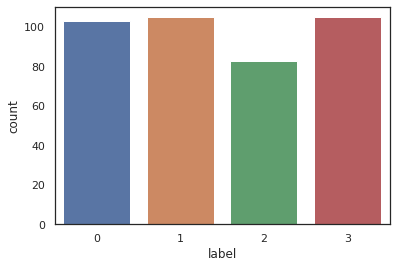

In [ ]:
Y_train = train["label"]

# 'label' column 을 drop
X_train = train.drop(labels = ["label"],axis = 1) 

g = sns.countplot(Y_train)

Y_train.value_counts()

In [ ]:
X_train = X_train / 255.0
test = test / 255.0

X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [ ]:
Y_train = to_categorical(Y_train, num_classes = 4)

In [ ]:
random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, 
                                                  test_size = 0.1, 
                                                  random_state=random_seed)

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))



model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation = "softmax"))

In [ ]:
model.summary()

Model: "sequential_109"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_436 (Conv2D)          (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_437 (Conv2D)          (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_218 (MaxPoolin (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_327 (Dropout)        (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_438 (Conv2D)          (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_439 (Conv2D)          (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_219 (MaxPoolin (None, 7, 7, 64)       

In [ ]:
model.compile(optimizer = Adam(lr=0.001) , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(X_train, Y_train, epochs=30, validation_data=(X_val,Y_val))

Epoch 1/30
12/12 [==============================] - 0s 18ms/step - loss: 1.3385 - accuracy: 0.3230 - val_loss: 1.2239 - val_accuracy: 0.3500
Epoch 2/30
12/12 [==============================] - 0s 7ms/step - loss: 1.0340 - accuracy: 0.5534 - val_loss: 0.9963 - val_accuracy: 0.4750
Epoch 3/30
12/12 [==============================] - 0s 7ms/step - loss: 0.8516 - accuracy: 0.6264 - val_loss: 0.6243 - val_accuracy: 0.7500
Epoch 4/30
12/12 [==============================] - 0s 7ms/step - loss: 0.7324 - accuracy: 0.6854 - val_loss: 0.5931 - val_accuracy: 0.7500
Epoch 5/30
12/12 [==============================] - 0s 6ms/step - loss: 0.5977 - accuracy: 0.7584 - val_loss: 0.5538 - val_accuracy: 0.7250
Epoch 6/30
12/12 [==============================] - 0s 6ms/step - loss: 0.5702 - accuracy: 0.7416 - val_loss: 0.4318 - val_accuracy: 0.8250
Epoch 7/30
12/12 [==============================] - 0s 6ms/step - loss: 0.5123 - accuracy: 0.7978 - val_loss: 0.3952 - val_accuracy: 0.9250
Epoch 8/30
12/12 [=